<h1>Preparation of the German Twitter Data</h1>

<p>This file is for preparing the german tweets. The preparation is mainly for training my own model for sentiment detection with Flair. </p>

In [95]:
import csv
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [72]:
#nltk.download('stopwords')

<h1>Einlesen und bestimmung der Felder</h1>
<p>Durch die weitern Operatoren, kann ich die einzelnen Felder in DF bestimmen. Durch die Lambda Funktion werden die Str zu Listen, was die spätere verarbeitung erleichtert. 
    Durch die Parse_dates Funktion wird das Datumsfeld zu einem Timestamp, was die weiter Verarbeitung wesentlich leichter macht.</p>

In [28]:
df_manager_de = pd.read_csv("/Users/tobias/Dev/FOM/Master_Thesis/data/Manager_DE/data.csv", sep=";", 
                            converters={"tweet_type": lambda x: x.strip("[]").replace("'", "").split(", "),
                                        "referenced_tweet_id": lambda x: x.strip("[]").replace("'", "").split(", ")},
                           parse_dates=["created_at"])
df_manager_de = df_manager_de.explode(["referenced_tweet_id", "tweet_type"], ignore_index=True)

In [257]:
df_manager_de.head()

conversation_id   author_id                created_at  \
0  703311366262800384  1392131804 2016-02-26 20:11:11+00:00   
1  702405572012974080  1053723204 2016-02-24 08:11:53+00:00   
2  701784983829143553   554491983 2016-02-22 15:05:53+00:00   
3  701446667170615296  3365669884 2016-02-21 16:41:32+00:00   
4  700597812556386304  4858383167 2016-02-19 08:28:29+00:00   

             tweet_id lang  retweet_count  reply_count  like_count  \
0  703311366262800384   de              0            0           2   
1  702405572012974080   de              0            0           0   
2  701784983829143553   de              0            0           0   
3  701446667170615296   de              0            0           1   
4  700597812556386304   de              2            0           0   

   quote_count              source tweet_type referenced_tweet_id  \
0            0  Twitter Web Client       None                None   
1            0  Twitter Web Client       None                None   
2            0            Facebook       None                None   
3            0  Twitter Web Client       None                None   
4            0  Twitter for iPhone  retweeted  700578193334411264   

                                                text  
0  #Wirecard-Chef Markus Braun pumpt irrwitzige S...  
1  Jetzt günstig einsammeln und später absahnen? ...  
2  Morgen startet die neue Reihe R²-JazzCube! Vol...  
3  die Y-Achse des  #prusai3 nimmt Formen an :-) ...  
4  RT @aktionaer: #Wirecard: Was führt der Vorsta...

In [29]:
len(df_manager_de)

14451

<br>
<p>Prüfen welche Datenfelder in den einzelnen Zeilen enthalten sind. War wichtig um diese anpassen zu können.</p>

In [204]:
print("conversation_id: ", df_manager_de.iloc[0]["conversation_id"], "type: ", type(df_manager_de.iloc[0]["conversation_id"]))
print("author_id: ", df_manager_de.iloc[0]["author_id"], "type: ", type(df_manager_de.iloc[0]["author_id"]))
print("created_at: ", df_manager_de.iloc[0]["created_at"], "type: ", type(df_manager_de.iloc[0]["created_at"]))
print("tweet_id: ", df_manager_de.iloc[0]["tweet_id"], "type: ", type(df_manager_de.iloc[0]["tweet_id"]))
print("lang: ", df_manager_de.iloc[0]["lang"], "type: ", type(df_manager_de.iloc[0]["lang"]))
print("retweet_count: ", df_manager_de.iloc[0]["retweet_count"], "type: ", type(df_manager_de.iloc[0]["retweet_count"]))
print("reply_count: ", df_manager_de.iloc[0]["reply_count"], "type: ", type(df_manager_de.iloc[0]["reply_count"]))
print("like_count: ", df_manager_de.iloc[0]["like_count"], "type: ", type(df_manager_de.iloc[0]["like_count"]))
print("quote_count: ", df_manager_de.iloc[0]["quote_count"], "type: ", type(df_manager_de.iloc[0]["quote_count"]))
print("source: ", df_manager_de.iloc[0]["source"], "type: ", type(df_manager_de.iloc[0]["source"]))
print("tweet_type: ", df_manager_de.iloc[0]["tweet_type"], "type: ", type(df_manager_de.iloc[0]["tweet_type"]))
print("referenced_tweet_id: ", df_manager_de.iloc[0]["referenced_tweet_id"], "type: ", type(df_manager_de.iloc[0]["referenced_tweet_id"]))
print("text: ", df_manager_de.iloc[0]["text"], "type: ", type(df_manager_de.iloc[0]["text"]))

conversation_id:  703311366262800384 type:  <class 'numpy.int64'>
author_id:  1392131804 type:  <class 'numpy.int64'>
created_at:  2016-02-26 20:11:11+00:00 type:  <class 'pandas._libs.tslibs.timestamps.Timestamp'>
tweet_id:  703311366262800384 type:  <class 'numpy.int64'>
lang:  de type:  <class 'str'>
retweet_count:  0 type:  <class 'numpy.int64'>
reply_count:  0 type:  <class 'numpy.int64'>
like_count:  2 type:  <class 'numpy.int64'>
quote_count:  0 type:  <class 'numpy.int64'>
source:  Twitter Web Client type:  <class 'str'>
tweet_type:  None type:  <class 'str'>
referenced_tweet_id:  None type:  <class 'str'>
text:  #Wirecard-Chef Markus Braun pumpt irrwitzige Summen in sein Unternehmen. Woher stammt das Geld? @SchreiberDohms  https://t.co/VdsV4nvBe4 type:  <class 'str'>


<h3>Löschen von unnötigen Informationen</h3>
<p>Hier werden Informationen aus den Tweets Texten, die nicht weiter benötigt werden. Bspw. Links</p>

In [30]:
for each in range(len(df_manager_de)):
    df_manager_de.loc[df_manager_de["text"] == 
                      df_manager_de.loc[each]["text"], "text"] = re.sub(r'http\S+', '', 
                                                                        (re.sub('@[^\s]+', '',
                                                                                re.sub('#', '', 
                                                                                       df_manager_de.loc[each]["text"]))))

In [31]:
df_manager_de.iloc[0]["text"]

'Wirecard-Chef Markus Braun pumpt irrwitzige Summen in sein Unternehmen. Woher stammt das Geld?   '

In [32]:
len(df_manager_de)

14451

<br>df_manager_deNicht Kontextbezogene Tweets löschen</h3>
<p>So kann ich prüfen ob bestimmte Begriffe in den Texten enthalten sind und mir die conversation_id ausgeben lassen. Diese lasse ich dann löschen und auch zugehörige Tweets, da diese nicht in den Kontext passen.<br>Die wörter in der Liste müssen klein geschrieben werden, da auch alle Buchstaben für die Prüfung klein geschrieben werden müssen, da sinst nicht alles erkannt wird.</p>
<p>Zu löschende Begriffe</p>
<ul>
    <li>BVB</li>
    <li>Fußball</li>
    <li>Fussball</li>
    <li>Dortmund</li>
</ul>

In [33]:
not_used_words_list = ["bvb", "fußball", "fussball", "dortmund"]
tweet_id_without_context_list = []
for each in range(len(df_manager_de)):
    for word in not_used_words_list:
        if word in df_manager_de.iloc[each]["text"].lower():
            if df_manager_de.iloc[each]["tweet_id"] not in tweet_id_without_context_list:
                tweet_id_without_context_list.append(df_manager_de.iloc[each]["tweet_id"])

<p>Iteration durch die Liste mit zu löschenden Tweets, bis der Wert zu Beginn und zum Ende gleich ist und es keine
weiteren Tweets mehr gibt, die gefiltert werden müssen. </p>

In [34]:
def check_for_further_tweets():
    start_len = len(tweet_id_without_context_list)
    for each in range(len(tweet_id_without_context_list)):
        df_tweets = df_manager_de.loc[(df_manager_de["conversation_id"] == tweet_id_without_context_list[each]) | 
               (df_manager_de["referenced_tweet_id"] == str(tweet_id_without_context_list[each]))]

        for each in range(len(df_tweets)):
            if df_tweets.iloc[each]["tweet_id"] not in tweet_id_without_context_list:
                tweet_id_without_context_list.append(df_tweets.iloc[each]["tweet_id"])
                
    if start_len != len(tweet_id_without_context_list):
        check_for_further_tweets()
check_for_further_tweets()

<p>Löschen der nicht kontextbezogenen Tweets und den Index neu setzen um später keine Probleme mit dem Index zu bekommen.</p>

In [35]:
for each in tweet_id_without_context_list:
    df_manager_de = df_manager_de.drop(df_manager_de.loc[df_manager_de["tweet_id"] == each].index[0])
df_manager_de = df_manager_de.reset_index(drop=True)

In [36]:
len(df_manager_de)

14407

<br>
<h4>Check</h4>
<p>Aufrufen einer Line um zu prüfen, welche Informationen enthalten sind.<br>
    Den Index abrufen um mir nur den Text in voller Länge anzeigen zu lassen, da dieser sonst gekürzt ist.</p>
   

In [69]:
df_manager_de.loc[df_manager_de["conversation_id"] == 1098841597582737409]

Empty DataFrame
Columns: [conversation_id, author_id, created_at, tweet_id, lang, retweet_count, reply_count, like_count, quote_count, source, tweet_type, referenced_tweet_id, text]
Index: []

In [49]:
df_manager_de.loc[df_manager_de.index[df_manager_de["conversation_id"] == 1278435775441494016].tolist()[0]]["text"]

'RT @RNBVB: 👨🏻\u200d⚕️ Dr. Markus #Braun ist vom Nachrichtenmagazin #Focus als "Top-Mediziner" in Deutschland ausgezeichnet worden. Zuletzt arbei…'

In [48]:
print(df_manager_de.index[df_manager_de["conversation_id"] == 1278435775441494016].tolist()[0])

14209


In [36]:
df_manager_de.loc[14209]["text"]

'RT @RNBVB: 👨🏻\u200d⚕️ Dr. Markus #Braun ist vom Nachrichtenmagazin #Focus als "Top-Mediziner" in Deutschland ausgezeichnet worden. Zuletzt arbei…'

<br>
<h3>Löschen von Retweets</h3>
<p>Alle Retweets löschen, da diese in diesem Schritt nicht benötigt werden.</p>

In [37]:
counter = 0
retweet_list = []
for each in range(len(df_manager_de)):
    if "retweeted" in df_manager_de.iloc[each]["tweet_type"]:
        retweet_list.append(each)
        counter += 1
print(counter)

5428


In [38]:
df_manager_de = df_manager_de.drop(retweet_list)

<h1>Löschen von doppelten Tweets</h1>
<p>Alle Tweets, die dopplet im Datensatz enthalten sind, anhand der tweet_id werden gelöscht. Somit werden auch die zuvor aufgespalteten Listen wieder gelöscht</p>

In [39]:
df_manager_de = df_manager_de.drop_duplicates(subset=["tweet_id"])

In [40]:
len(df_manager_de)

8836

<h1>Check User</h1>
<p>Überprüfe die User Daten nach Namen, die nichts mit dem Thema Wirecard zu tun haben. Auch Nutzer, die ggf. nur durch Zufall in die Abfrage gekommen sind, z.B. durch den gleichen Namen wie einer der Manager, sollen aus dem Datensatz entnommen werden.<br>Auffällige Namen sind <b>Markus Braun</b> und <b>Jan Marsalek</b>, da es sich um den CEO und den verantwortlichen Manager handelt.</p>

In [31]:
df_user = pd.read_csv("/Users/tobias/Dev/FOM/Master_Thesis/data/Manager_DE/user.csv", sep=";")

<p>Prüfen nach allen Nutzern mit dem Namen Markus</p>

In [32]:
df_user.loc[df_user.name.str.lower().str.contains("markus")].drop_duplicates()

user_id         username                       name  \
3              3365669884      MarkusB1980               Markus Braun   
53              170698930     Magix_Markus               Magic Markus   
58     827452635057881088     _MarkusBraun               Markus Braun   
91              536335486        Advobraun            RA Markus Braun   
253             745165314         mvdweyer        Markus van de Weyer   
951   1174753444189671424  MarkusW28522797                Markus Wolf   
1053           1201441525      MarkusFasse               Markus Fasse   
1298   780754694419296256    markuscbraun1            Markus C. Braun   
1347  1053554251367174145        MWeingran             MarkusWeingran   
1506            855232346      MarkusBlume               Markus Blume   
1580            348646470   MarkusMetschke            Markus Metschke   
1777   960496784278683648   MarkusTiemann1             Markus Tiemann   
1926  1160868405429383168   Markus70044344               Markus Naier   
2011           4143865486     MarkusToehne               Markus Töhne   
2624             56951088          patolix             Markus Trenker   
2720  1019851548350910464       mag_markus    Mag. Markus Steinbacher   
3426            497968900     MarkusEhrler              Markus Ehrler   
3445            572140860       rapidler74               Markus Riedl   
3734           2473666566     bachsblueten                Markus Bach   
3841           4548026189     markusdelitz            Markus Delitz ✨   
4573           1193169414    KorinekMarkus             Markus Korinek   
4823             14162263     markuswaeger               Markus Wäger   
4888            443638494   markuskrainer1             markus krainer   
4953             46415147           kubant                     markus   
5125   897858675855040512  MarkusMahler512              Markus Mahler   
5141             38137133   Dr_MarkusMeier               Markus Meier   
5197            197528170        ms_nieder          Markus Niedermann   
5397             37611246       rieksmeier          Markus Rieksmeier   
5932  1220822278440615936  MarkusA28136072        Markus ponnyhof.Sol   
5980            348086065         Leineems                     Markus   
7290            178680931      msulzbacher          Markus Sulzbacher   
7329   851496036472324098     Markus_Krall           Dr. Markus Krall   
7574           1011258769        abwerzger           Markus Abwerzger   
8162            176053221         KompaLaw               Markus Kompa   
8262            148084651     mwolschlager         Markus Wolschlager   
8358             49411452         mpindeus             Markus Pindeus   
8434  1043410202744246272  ElLatin85341655               Huber Markus   
8519  1031158517024079877       devotedly9         Markus Bruckmüller   
8542            221144872     unsigned_int        Markus Lauterbacher   
9001           2382279415      MarkusGroll               Markus Groll   
9133           2988134535   NeunerOfficial        Markus Neuner (SPÖ)   
9322             21320873  markus_reichert            Markus Reichert   
9567           1145319596      MarkusRosch               Markus Rosch   
9605            137070802  Markus_Wolf_HVA  Generaloberst Markus Wolf   

      follower  following  tweet_cound  list_count  verified  \
3           82        181          620          13     False   
53         163        192        24324          18     False   
58       31414         88         1162          81      True   
91          17         93           16           0     False   
253       1141       1297        35732         199     False   
951          0          4            2           0     False   
1053      1688       1065         2299          53     False   
1298        85        232           89           0     False   
1347       176         50          325           3     False   
1506     12911        284         1333         196      True   
1580         5         44   

<p>Prüfen auf auffäliige Einträge bezüglich Jan Marksalek</p>

In [33]:
df_user.loc[df_user.name.str.lower().str.contains("jan")].drop_duplicates()

user_id         username  \
181              152703288   dejanjovicevic   
471     960630599601082368        JHendrikP   
626              571011183       SeraelJann   
791              427754037        clauci2nd   
1089    861221059747610624     proudtobehay   
1120              48455041        Willmroth   
1456   1169762222790385665   Jannis73502821   
1488    926892715706593280     JanKaiserICH   
1915            1009685810  DanielaLongding   
1946   1225022850735771648          JMoldau   
2155    748259499245510656       sparfindig   
2158            2152612894           jc8136   
2631              19072286         janboehm   
2647    804934696555704320    Jane_Doe40806   
2734            3353363103   JanDHildebrand   
3033   1273891164224139264  JanMuel28853482   
3111            3170249476       jannikkel6   
3307   1269540544537145344        AktienUni   
3450             427754037        clauci2nd   
3791            2782752599          JanWa94   
3797              14359266           knalli   
4159             384818445         JanHemme   
4421   1244642921313435648         janvp000   
4734    838611262137372674    Jan2345678901   
4896   1262484333010604039         FreseJan   
4922              40251964        Ja_gir100   
5017              52198884  FineJanCannibal   
5553              18584829       jan_hauser   
5796            2771331905          janvesp   
6309    960463104537657344        DjirSarai   
6632            2857610675       JankoTietz   
6683   1281873818433269760     JanBehrens16   
6684             504918158  jan_buehlbecker   
6733   1025796393129177088  klausdietermai1   
6765            1262597888        J_Ehemann   
7369   1171000359638188033     januszcwikla   
7984   1067221755813654528      jannemanncs   
9025            1260188096     KarlssonKann   
9435             787856124            8B_EC   
9512            3357661984        janvoss81   
9760            2224564819           __ljrk   
10002             63764458       janejane24   
10096           1261872733    AndreasSJanke   
10294            972233251    Jan_Heiermann   

                                                    name  follower  following  \
181                                      Dejan Jovicevic      1785       1449   
471                                                  Jan        61        143   
626                                           SeraelJann         5         18   
791          claudia janecek - food & medicine #Yemen 🇾🇪      3504       4269   
1089                                              Django        48        803   
1120                                     Jan Diesteldorf      1995        957   
1456                                              Jannis         2         95   
1488                                          Jan Kaiser         3         22   
1915                                       daniel janson        10        100   
1946                                          Jan Moldau         0         10   
2155                           spar|fin|dig : Jan Tietje       619        919   
2158                                                 jan        89        167   
2631                                  Jan Böhmermann 😷🦠🤨   2502132       2042   
2647                                            Jane Doe      4615       4081   
2734                                      Jan Hildebrand      2547        883   
3033                                         Jan Mueller         0          4   
3111                             Jan Nikkel (geboostert)       323        297   
3307                          Jan Wolters | AktienUni.de       434        286   
3450         claudia janecek - food & medicine #Yemen 🇾🇪      3504       4269   
3791                                         Jan Wagener        11         57   
3797                                         Jan Philipp       246        510   
4159                                           Jan Hemme      1270        279   
4421                                    

<p>Auffällige User_IDs:</p>
<ul>Markus Braun
    <li>3365669884 - MarkusB1980</li>
    <li>827452635057881088 - _MarkusBraun</li>
    <li>536335486 - Advobraun</li>
    <li>780754694419296256 - markuscbraun1</li>
</ul>
<ul>Jan (Marsalek)
    <li>19072286 - janboehm</li>
</ul>

<p>Anzeigen der Tweets der "auffälligen" Nutzer</p>

In [40]:
pd.set_option('display.max_colwidth', None)
df_manager_de.loc[df_manager_de["author_id"] == 3365669884]["text"]

3        die Y-Achse des  prusai3 nimmt Formen an :-)  3ddrucker 3dprint
10               Der Rahmen vom prusai3 ist zusammen gebaut :-)  3dprint
18    "kleiner" Bericht zum Grillen mit Freunden  grillen bbq pulledpork
Name: text, dtype: object

In [41]:
pd.set_option('display.max_colwidth', None)
df_manager_de.loc[df_manager_de["author_id"] == 827452635057881088]["text"]

Series([], Name: text, dtype: object)

In [42]:
pd.set_option('display.max_colwidth', None)
df_manager_de.loc[df_manager_de["author_id"] == 536335486]["text"]

86    NEUE HOMPAGE MIT NEUEN FUNKTIONEN 
Name: text, dtype: object

In [43]:
pd.set_option('display.max_colwidth', None)
df_manager_de.loc[df_manager_de["author_id"] == 780754694419296256]["text"]

Series([], Name: text, dtype: object)

In [44]:
pd.set_option('display.max_colwidth', None)
df_manager_de.loc[df_manager_de["author_id"] == 19072286]["text"]

Series([], Name: text, dtype: object)

<p>Nur bei zwei der Nutzer ist nach der Vorverarbeitung noch ein Tweet in der Liste. Diese beiden Nutzer tragen nichts zum Thema Wirecard bei und twittern nicht diesbezüglich. <br>Ich habe Jan bei der Suche nach Jan lediglich den Namen Jan Böhmermann geprüft, da es sich hierbei um eine bekannte Persönlichkeit handelt, die zu diesem aber auch zu vielen anderen Themen twittert und ich dies deswegen überprüfen wollte.</p>

In [45]:
df_user["name"].value_counts().head(50)

Markus Braun                                   44
Handelsblatt                                   29
Wirecard                                       27
kein Spekulant blauer Haken                    26
FAZ Finanzen                                   26
Dr. Fred... no MD/PD/XYZ-D                     25
Ehssan Khazaeli                               25
AMCtoooMoon                                    25
HandelsblattFinanzen                           24
manager magazin                                24
csfa.                                          22
A.Barendrecht                                  21
Daniel                                         20
cS-Strategies                                  20
Frankfurter Allgemeine gesamt                  20
Mario                                          20
Nils Wischmeyer                                20
FinanzNachrichten.de                           20
🎲 Policon automatisches Nachrichtenportal 👽    19
WirtschaftsWoche                               19


In [109]:
df_manager_de["author_id"].value_counts().to_frame().reset_index()

index  author_id
0     1118219555967520769        865
1     1159698800790953984        192
2              3029833842        175
3              2195833356         89
4     1100318139718414336         65
...                   ...        ...
2493            312358120          1
2494           3279547546          1
2495   835150061516558336          1
2496           3009224172          1
2497             58417079          1

[2498 rows x 2 columns]

In [117]:
df_manager_de["author_id"].value_counts().to_frame().reset_index().join(
    df_user.set_index("user_id"), on="index").drop_duplicates(subset=["index"]).head(11)

index  author_id         username  \
0   1118219555967520769        865    AMCtootheMoon   
1   1159698800790953984        192     blvddemoulin   
2            3029833842        175   Steinfireflint   
3            2195833356         89          Ch11110   
4   1100318139718414336         65       Tradefair6   
5    704753138146877440         65  csFraudAnalysis   
6            2280206959         59      FreieWeltEu   
7             172082646         57      Bonnetmaker   
8   1095261591203966976         55     Kaan24263371   
9             583334012         52       blockhero_   
10             60673185         52   EhssanKhazaeli   

                                           name  follower  following  \
0                                   AMCtoooMoon       274        221   
1                                 A.Barendrecht       159        964   
2                    Dr. Fred... no MD/PD/XYZ-D       465        323   
3                                         Ch111        21        149   
4                                     Tradefair        44         33   
5                                         csfa.      1035        561   
6   🎲 Policon automatisches Nachrichtenportal 👽       689       2229   
7                                    Götz Kluge       268        591   
8                                         Aslan        93        133   
9                                 blockhero.eth       549       1480   
10                            Ehssan Khazaeli        362          1   

    tweet_cound  list_count  verified                 created_at  
0         22555           1     False  2019-04-16 18:28:12+00:00  
1          5477           0     False  2019-08-09 05:31:55+00:00  
2         23065          12     False  2015-02-19 12:35:58+00:00  
3          1422           0     False  2013-11-15 11:36:59+00:00  
4          1766           1     False  2019-02-26 08:54:22+00:00  
5         15064          29     False  2016-03-01 19:40:16+00:00  
6       1570308          66     False  2014-01-07 07:14:28+00:00  
7         15730           2     False  2010-07-28 21:40:20+00:00  
8          4525           1     False  2019-02-12 10:01:27+00:00  
9         15540           2     False  2012-05-18 01:19:29+00:00  
10         1599           4     False  2009-07-27 18:38:20+00:00

In [135]:
pd.set_option('display.max_colwidth', None)
df_manager_de.loc[df_manager_de["author_id"] == 60673185]["text"]

87                                                                                                            Wirecard Chef Markus Braun rechnet mit einer „Vervielfachung“ des Unternehmenswerts. Bin auch voll von dem Unternehmen überzeugt. nobullshit 
288                                                                                                                                                                            Markus Braun kündigt gegenüber  an:  wird boon. zu Smartphone-Bank ausbauen.
389                                                                                    im Interview mit  "Unsere interne Untersuchung ist weitestgehend abgeschlossen. Deshalb kann ich heute schon sagen, dass an den Vorwürfen nichts dran ist.“ Wirecard
1440                                                                                                                                                                                Aschheim zieht Konsequenzen: Wirecard beruft Sonderprüfer.  for 

<p><br><b>Check nach besonderen Namen, die in der Liste besonder oft auftauchen oder Namen, denen eine besondere Bedeutung zugeordnet wird.</b></p>

In [174]:
df_user.loc[df_user.name.str.contains("markus")].drop_duplicates()

user_id        username            name  follower  following  \
4888  443638494  markuskrainer1  markus krainer         2         34   
4953   46415147          kubant          markus        64        340   

      tweet_cound  list_count  verified                 created_at  
4888           10           0     False  2011-12-22 11:25:26+00:00  
4953         2786           0     False  2009-06-11 15:46:37+00:00

<p><b>Tweets von den zu prüfenden Leuten ansehen</b></p>

In [194]:
user_id_list = []
for each in df_user.loc[df_user.name.str.lower().str.contains("jan")].drop_duplicates()["user_id"]:
    user_id_list.append(each)
df_manager_de.loc[df_manager_de.author_id.isin(user_id_list)]

conversation_id           author_id                created_at  \
196    1039392642847535104           152703288 2018-09-11 05:58:11+00:00   
197    1039176827049332736           152703288 2018-09-10 15:40:37+00:00   
602    1110837535423504384  960630599601082368 2019-03-27 10:11:37+00:00   
1039   1116041090677784578           571011183 2019-04-10 20:15:23+00:00   
1058   1114423943761473536           571011183 2019-04-06 10:05:16+00:00   
...                    ...                 ...                       ...   
14034  1279469432948088832          1261872733 2020-07-04 17:37:38+00:00   
14279  1278761776377663489  804934696555704320 2020-07-02 18:45:40+00:00   
14291  1278749709469913091           972233251 2020-07-02 17:57:43+00:00   
14305  1278732404497223681            48455041 2020-07-02 16:48:57+00:00   
14407  1278273529566429190          2152612894 2020-07-01 10:25:33+00:00   

                  tweet_id lang  retweet_count  reply_count  like_count  \
196    1039392642847535104   de              0            0           1   
197    1039176827049332736   de              2            0           0   
602    1110846829795729408   de              0            1           1   
1039   1116072202288467968   de              0            1           1   
1058   1114469109914374144   de              0            0           0   
...                    ...  ...            ...          ...         ...   
14034  1279469432948088832   de              1            0           0   
14279  1278761776377663489   de             19            0           0   
14291  1278749709469913091   de              1            0           0   
14305  1278732404497223681   de              3            0           0   
14407  1278273529566429190   de              2            0           0   

       quote_count               source  tweet_type  referenced_tweet_id  \
196              0             LinkedIn        None                 None   
197              0   Twitter for iPhone   retweeted  1039065678353973248   
602              0   Twitter for iPhone  replied_to  1110840122201784320   
1039             0      Twitter Web App  replied_to  1116065141014052864   
1058             0      Twitter Web App  replied_to  1114467448647028736   
...            ...                  ...         ...                  ...   
14034            0       Hootsuite Inc.   retweeted  1279467577413193728   
14279            0   Twitter for iPhone   retweeted  1278757395892703235   
14291            0      Twitter Web App   retweeted  1278748251315937280   
14305            0  Twitter for Android   retweeted  1278729605696884738   
14407            0   Twitter for iPhone   retweeted  1278269780349329408   

                                                    text  
196    Speaker Coup: Knapp nach DAX-Listing: Wirecard...  
197    RT @DarwinsCircle: Knapp nach DAX-Listing: Wir...  
602    @jens_algebra @_MarkusBraun Das ist doch jetzt...  
1039   @AuchDuMeinSohn @Alexand93433205 @Zwitscherpau...  
1058   @AuchDuMeinSohn @bald_saitama @aveirodobraga @...  
...                                                  ...  
14034  RT @welt: Gefälschte Einreiseunterlagen auf de...  
14279  RT @SZ: Die weltweite Suche nach Ex-Wirecard-V...  
14291  RT @VinzentLeitgeb: Eine Donald-Trump-Pappfigu...  
14305  RT @wischmeyer_n: Jan Marsalek, Ex-Vorstand vo...  
14407  RT @wischmeyer_n: Die Ermittler durchsuchen ni...  

[97 rows x 13 columns]

In [14]:
df_user.loc[df_user.name.str.lower().str.contains("markus")].drop_duplicates()

user_id         username                       name  \
3              3365669884      MarkusB1980               Markus Braun   
53              170698930     Magix_Markus               Magic Markus   
58     827452635057881088     _MarkusBraun               Markus Braun   
91              536335486        Advobraun            RA Markus Braun   
253             745165314         mvdweyer        Markus van de Weyer   
951   1174753444189671424  MarkusW28522797                Markus Wolf   
1053           1201441525      MarkusFasse               Markus Fasse   
1298   780754694419296256    markuscbraun1            Markus C. Braun   
1347  1053554251367174145        MWeingran             MarkusWeingran   
1506            855232346      MarkusBlume               Markus Blume   
1580            348646470   MarkusMetschke            Markus Metschke   
1777   960496784278683648   MarkusTiemann1             Markus Tiemann   
1926  1160868405429383168   Markus70044344               Markus Naier   
2011           4143865486     MarkusToehne               Markus Töhne   
2624             56951088          patolix             Markus Trenker   
2720  1019851548350910464       mag_markus    Mag. Markus Steinbacher   
3426            497968900     MarkusEhrler              Markus Ehrler   
3445            572140860       rapidler74               Markus Riedl   
3734           2473666566     bachsblueten                Markus Bach   
3841           4548026189     markusdelitz            Markus Delitz ✨   
4573           1193169414    KorinekMarkus             Markus Korinek   
4823             14162263     markuswaeger               Markus Wäger   
4888            443638494   markuskrainer1             markus krainer   
4953             46415147           kubant                     markus   
5125   897858675855040512  MarkusMahler512              Markus Mahler   
5141             38137133   Dr_MarkusMeier               Markus Meier   
5197            197528170        ms_nieder          Markus Niedermann   
5397             37611246       rieksmeier          Markus Rieksmeier   
5932  1220822278440615936  MarkusA28136072        Markus ponnyhof.Sol   
5980            348086065         Leineems                     Markus   
7290            178680931      msulzbacher          Markus Sulzbacher   
7329   851496036472324098     Markus_Krall           Dr. Markus Krall   
7574           1011258769        abwerzger           Markus Abwerzger   
8162            176053221         KompaLaw               Markus Kompa   
8262            148084651     mwolschlager         Markus Wolschlager   
8358             49411452         mpindeus             Markus Pindeus   
8434  1043410202744246272  ElLatin85341655               Huber Markus   
8519  1031158517024079877       devotedly9         Markus Bruckmüller   
8542            221144872     unsigned_int        Markus Lauterbacher   
9001           2382279415      MarkusGroll               Markus Groll   
9133           2988134535   NeunerOfficial        Markus Neuner (SPÖ)   
9322             21320873  markus_reichert            Markus Reichert   
9567           1145319596      MarkusRosch               Markus Rosch   
9605            137070802  Markus_Wolf_HVA  Generaloberst Markus Wolf   

      follower  following  tweet_cound  list_count  verified  \
3           82        181          620          13     False   
53         163        192        24324          18     False   
58       31414         88         1162          81      True   
91          17         93           16           0     False   
253       1141       1297        35732         199     False   
951          0          4            2           0     False   
1053      1688       1065         2299          53     False   
1298        85        232           89           0     False   
1347       176         50          325           3     False   
1506     12911        284         1333         196      True   
1580         5         44   

<h1>Prüfen nach der Wortanzahl in den Tweets</h1>
<p>Ich prüfe wie oft die einzelnen Wörter in den jeweiligen Tweets vorkommen um ggf. nicht passende Wörter zu ermitteln.</p>

In [21]:
re.sub('\W+', ' ', df_manager_de.iloc[0]["text"]).split()

['Wirecard',
 'Chef',
 'Markus',
 'Braun',
 'pumpt',
 'irrwitzige',
 'Summen',
 'in',
 'sein',
 'Unternehmen',
 'Woher',
 'stammt',
 'das',
 'Geld']

In [82]:
german_stop_words = stopwords.words('german')

In [75]:
text_list = []
for each in range(len(df_manager_de)):
    for word in re.sub('\W+', ' ', df_manager_de.iloc[each]["text"]).lower().split():
        if word not in german_stop_words:
            text_list.append(word)

In [76]:
len(text_list)

108358

In [77]:
len(df_manager_de)

8836

In [78]:
text_series = pd.Series(text_list)

In [79]:
type(text_series)

pandas.core.series.Series

In [80]:
type(text_list)

list

In [89]:
text_series.value_counts().head(50)

wirecard           4585
braun              2786
markus             2315
marsalek           1132
chef               1003
jan                 932
ex                  900
betrogen            626
jahre               554
vorstand            501
geld                459
ja                  452
schon               440
mal                 436
mehr                435
belogen             388
ceo                 368
partnerschaften     367
frei                343
dax                 336
immer               327
manager             302
via                 298
unternehmen         295
wien                291
betrüger            278
aktie               276
mann                273
deutschen           266
1                   257
aktien              256
heute               245
herr                244
gibt                242
wurde               239
größte              238
2                   236
kommt               227
geht                226
euro                224
davon               221
seit            

In [94]:
text_series.value_counts().quantile([.25, .5, .75, .995])

0.250      1.0
0.500      1.0
0.750      3.0
0.995    141.0
dtype: float64

In [73]:
german_stop_words = stopwords.words('german')

In [74]:
print(german_stop_words)

['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an', 'ander', 'andere', 'anderem', 'anderen', 'anderer', 'anderes', 'anderm', 'andern', 'anderr', 'anders', 'auch', 'auf', 'aus', 'bei', 'bin', 'bis', 'bist', 'da', 'damit', 'dann', 'der', 'den', 'des', 'dem', 'die', 'das', 'dass', 'daß', 'derselbe', 'derselben', 'denselben', 'desselben', 'demselben', 'dieselbe', 'dieselben', 'dasselbe', 'dazu', 'dein', 'deine', 'deinem', 'deinen', 'deiner', 'deines', 'denn', 'derer', 'dessen', 'dich', 'dir', 'du', 'dies', 'diese', 'diesem', 'diesen', 'dieser', 'dieses', 'doch', 'dort', 'durch', 'ein', 'eine', 'einem', 'einen', 'einer', 'eines', 'einig', 'einige', 'einigem', 'einigen', 'einiger', 'einiges', 'einmal', 'er', 'ihn', 'ihm', 'es', 'etwas', 'euer', 'eure', 'eurem', 'euren', 'eurer', 'eures', 'für', 'gegen', 'gewesen', 'hab', 'habe', 'haben', 'hat', 'hatte', 'hatten', 'hier', 'hin', 'hinter', 'ich', 'mich', 'mir', 'ihr', 'ihre', 'ihrem', 'ihren', 'ihrer', 'ihres', 'euc

In [108]:
wordcloud = WordCloud(width=2000, height=2000).generate(' '. join(text_series))

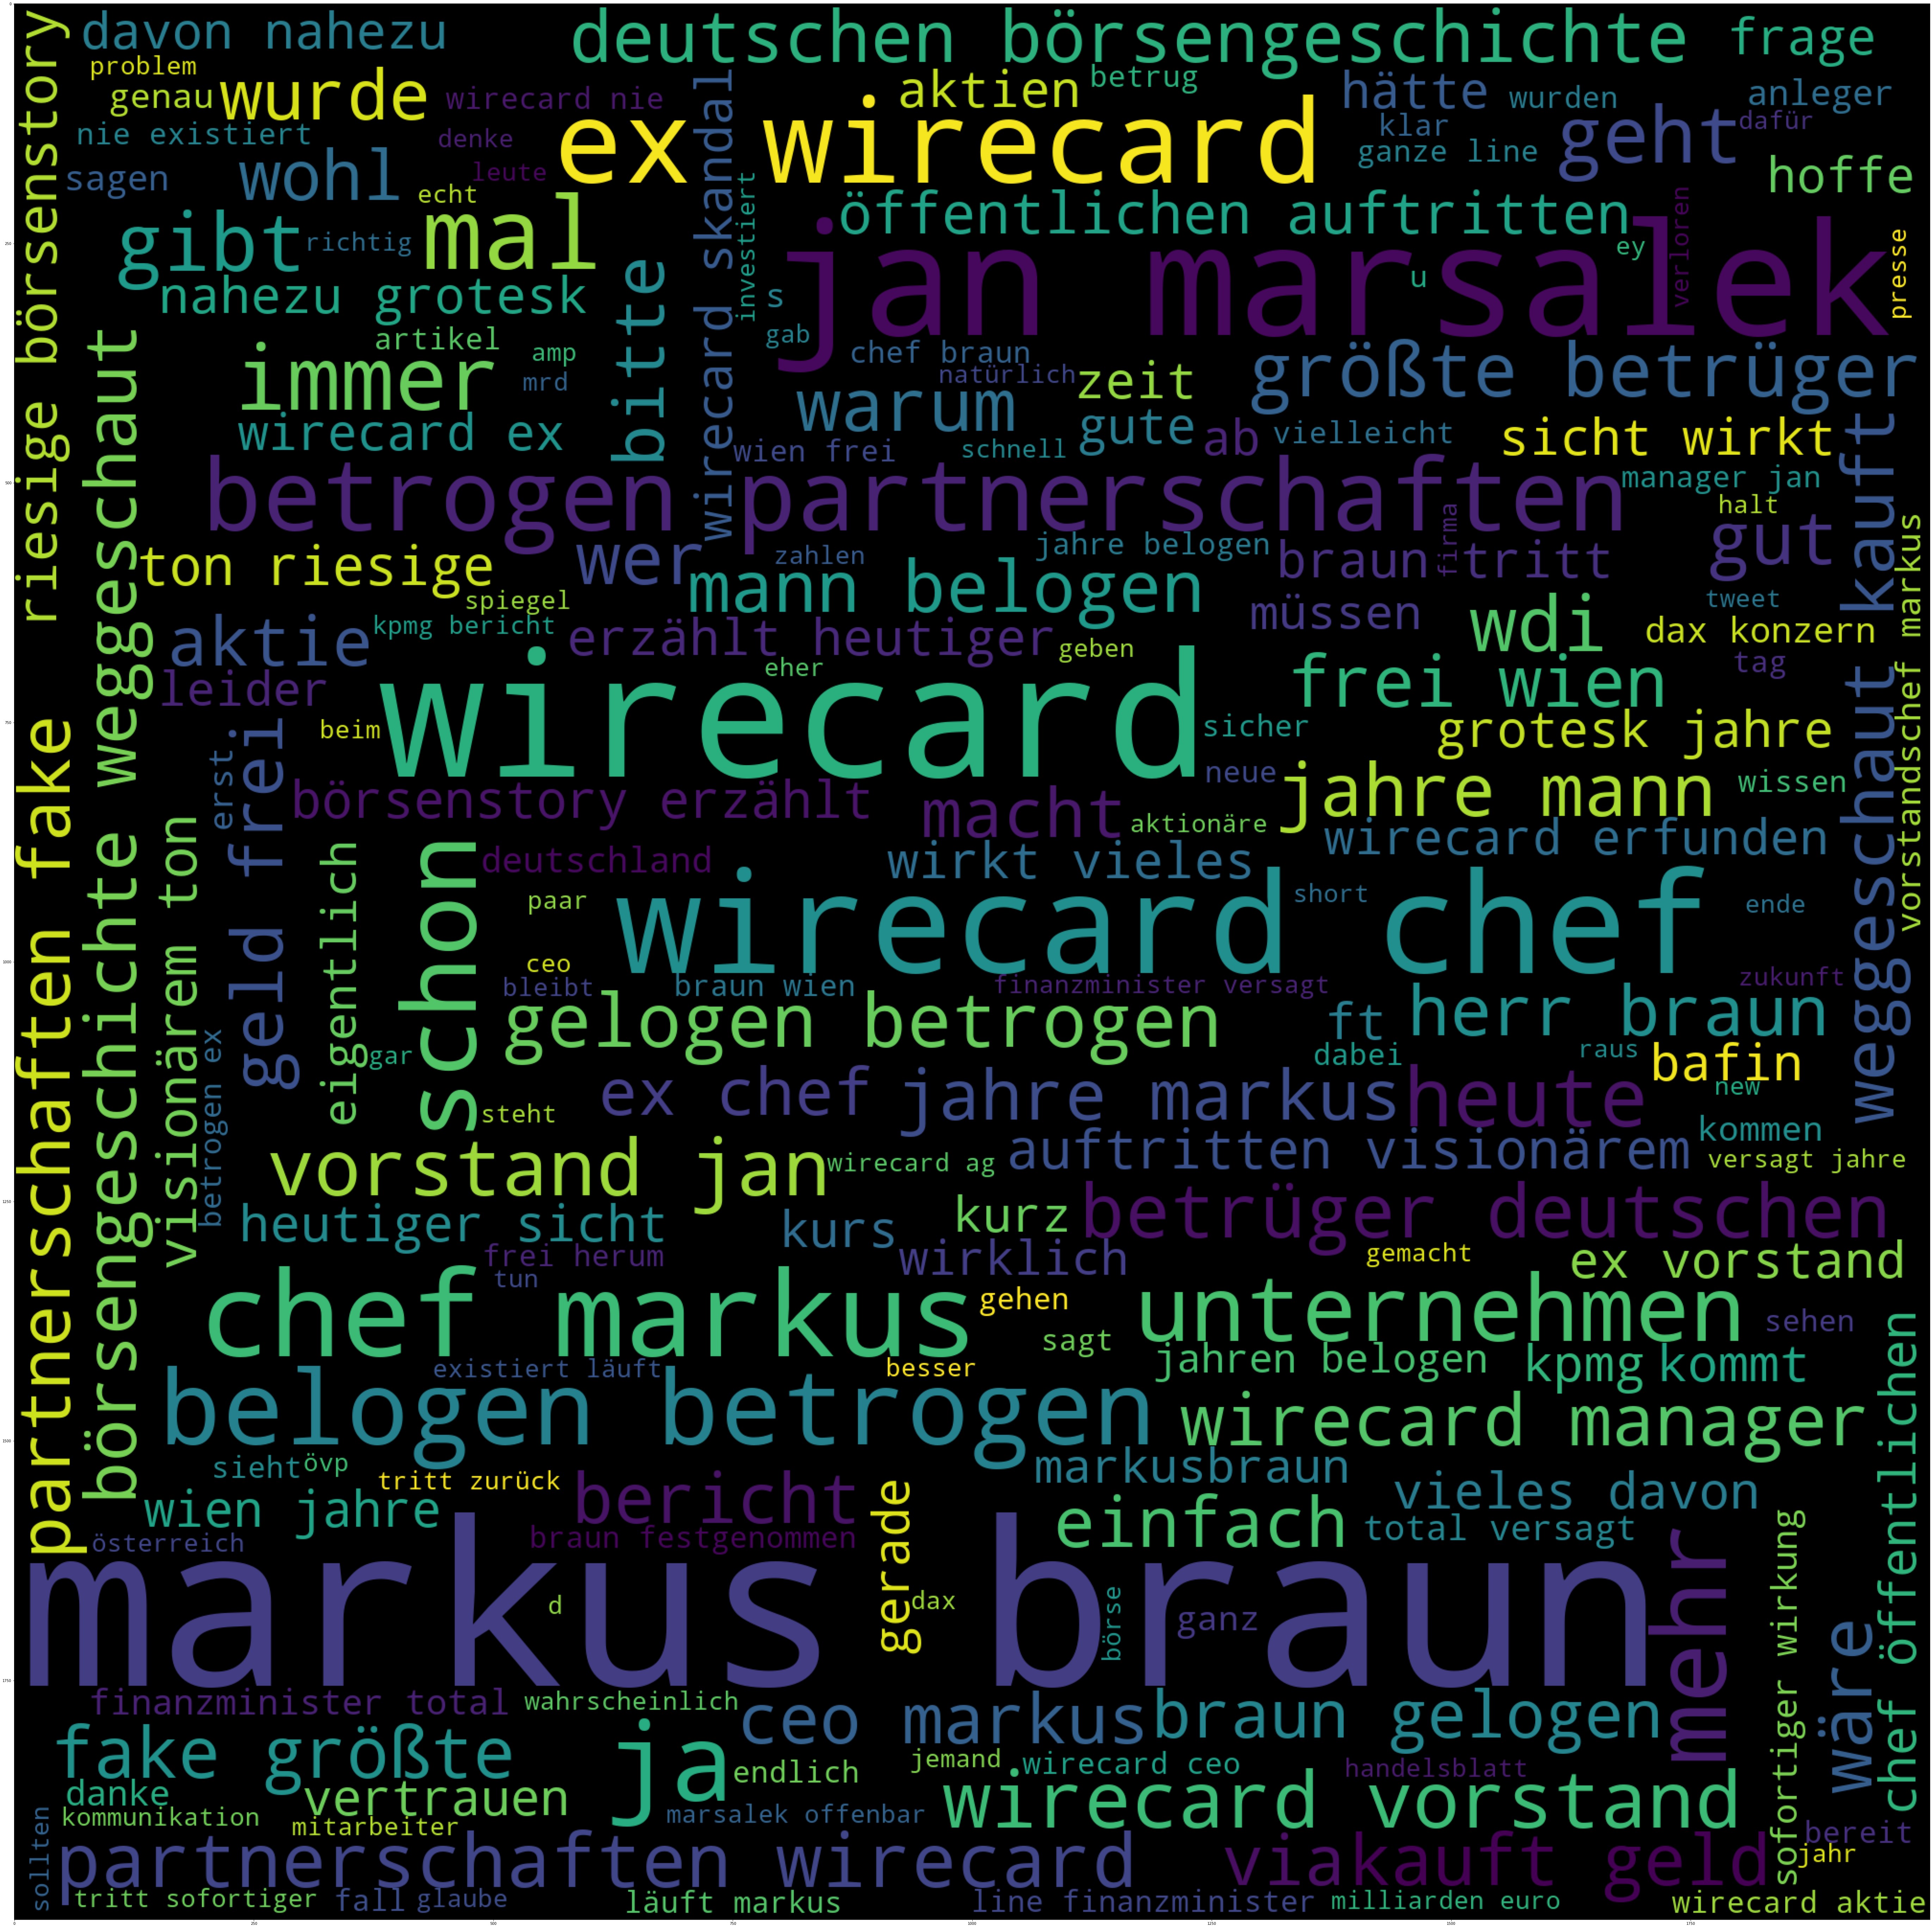

In [114]:
plt.figure(figsize=(200,100))
plt.imshow(wordcloud)
plt.show()